## 2. $H\rightarrow b\bar{b}$ via Sequential Cuts

To provide a simple baseline analysis, which can be used to compare a multivariate based analysis to, a set of selection cuts on the kinematic and topological paramaters first needs to be optimised. The goal is to apply cuts that maximise the _signal sensitivity_. Cuts should be applied on all variables other than $m_{bb}$, as the $m_{bb}$ distribution is used to evalute the _signal sensitivity_, which is calculated on a bin-by-bin basis from a given distribution ($m_{bb}$ is the most sensitive single variable, so in the absence of a multivariate approach, it is the best single variable to use to distinguish signal from background).

# 2.1 Optimising Cuts

The code below provides an example of how to use the ATLAS simulated data (which contains the signal and all the relevent background processes) to determine a selection of cuts on the kinematic and topoligical parameters to provide an optimal selection to maximise the _signal sensitivity_.

The plot_variable() function can be used to visualise how a particular kinematic or topological event variable is distributed for the various process involved. The code below plots the distributions of a few variables, with the signal (labelled $VH \rightarrow bb$ in the legend) shown in solid red and the other backgrounds shown as filled histograms of various colours, stacked on top of each other. For clarity a red solid line has also been plotted to help identify the shape of the sigal.

In [1]:
# Download the data files if we need them. If you download the repo as a ZIP, 
# this cell is not needed. If running on colab, it will automatically download
# all required data.

from pathlib import Path


data_path = Path('../data-v2/VHbb_data_2jet.csv')
class_path = Path('ucl_masterclass.py')
if not data_path.exists():
    !wget -P ../data-v2/ https://raw.githubusercontent.com/nikitapond/in2HEP/master/data-v2/VHbb_data_2jet.csv
else:
    print("Data file already found")

if not class_path.exists():
    !wget https://raw.githubusercontent.com/nikitapond/in2HEP/master/notebooks/ucl_masterclass.py
else:
    print("Required custom classes already found")

Data file already found
Required custom classes already found


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from copy import deepcopy
from ucl_masterclass import *

In [16]:
# Load data into a pandas data frame
df = pd.read_csv('../data-v2/VHbb_data_2jet.csv')
df_original = deepcopy(df)

### Cut-based selection

A suitable technique should be used to choose an optimal and simple selection of sequential cuts on the provided variables (it is not necessary to use all the variables, a subset should suffice), which provides an enhanced selection of signal relative the background. This will provide a baseline, which can be compared to the optimised NN performance later on.

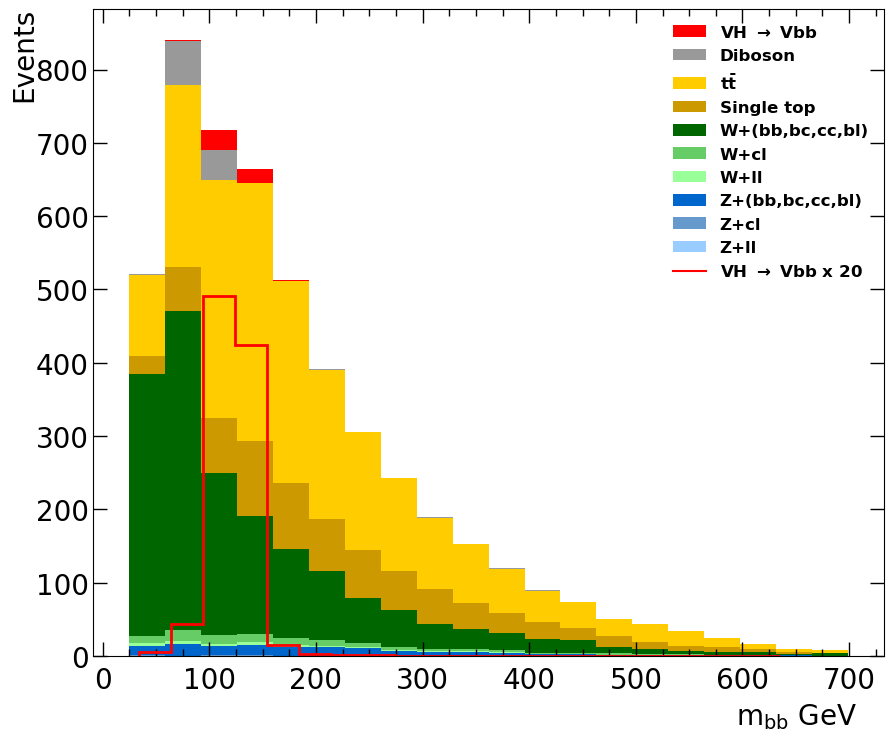

Sensitivity achieved before cuts  1.4990772856082444


In [18]:
# Apply cut

# The code below plots the mBB distribution before any selection is applied
plot_variable(df_original,'mBB')

# Calculate and output the sensitivity based up the original mBB distribution prior to any selection
# The sensitivity is calculated using the profile likelihood ratio test and Asimov approach
print("Sensitivity achieved before cuts ",sensitivity_cut_based(df_original))


##### Multiple cuts

As well as applying cuts on a single variable, you should also attempt to apply multiple cuts one after the other. Are optimal cuts over two variables at the same point when cutting on a single variable?

**Based upon material originally produced by hackingEducation for use in outreach**  
<img src="images/logo-black.png" width="50" align = 'left'/>

## Data Investigation

In [7]:
df.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,nJ,EventNumber,sample,...,mTW,dRBB,MET,Mtop,dPhiLBmin,MV1cJ3,Class,post_fit_weight,category,training_weight
0,0,0,0,0,0,0,0,2,135190,ggZllH125,...,37423.199219,3.022191,35582.070312,173959.187500,0.433436,0.2025,1.0,0.000288,VH,0.441960
1,1,1,1,1,1,1,1,2,158910,ggZllH125,...,32399.535156,2.095292,94344.554688,127825.226562,1.393339,0.2025,1.0,0.000296,VH,0.453550
2,2,2,2,2,2,2,2,2,116708,ggZllH125,...,28195.513672,1.003535,109446.429688,318686.750000,2.756902,0.2025,1.0,0.000299,VH,0.457858
3,3,3,3,3,3,3,3,2,117074,ggZllH125,...,47200.093750,1.181506,24177.300781,283867.406250,2.542176,0.2025,1.0,0.000294,VH,0.449803
4,4,4,4,4,4,4,4,2,114670,ggZllH125,...,4195.214844,1.826683,73605.992188,156267.296875,2.861569,0.2025,1.0,0.000265,VH,0.405355


In [8]:
column_name = 'category'
category = df[column_name].unique()
print(category)


['VH' 'ttbar_mc_a' 'stop' 'V+jets' 'diboson']


## One Variable Trial 

### pTB2

/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: invalid value encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Maximum Sensitivity Value: 1.6887878004642403
Corresponding pTB2 Threshold: 49000
Maximum Inverted Sensitivity Value: 0.7367710591667378
Corresponding pTB2 Threshold: 60000


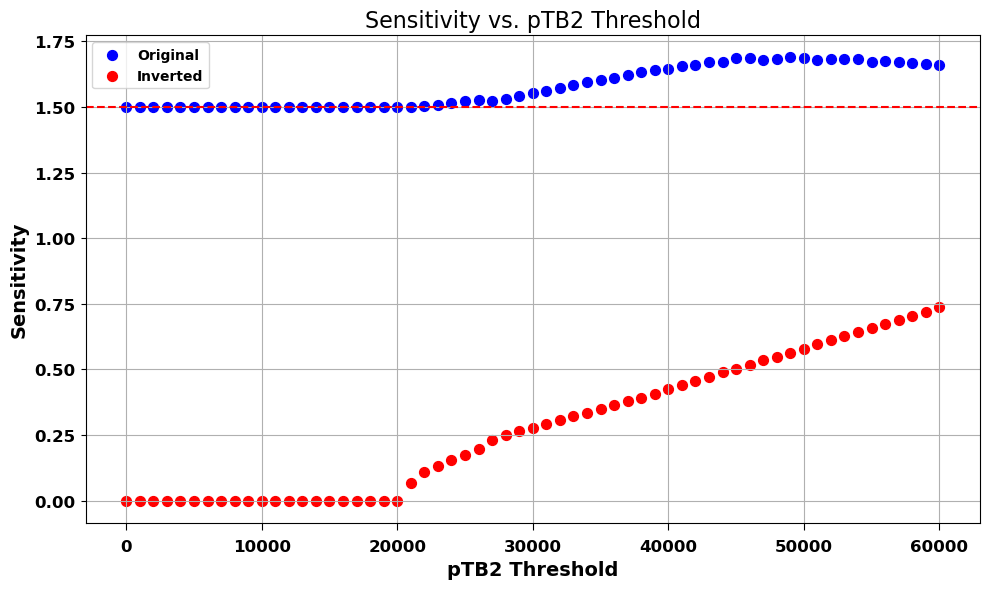

In [12]:
def plot_sensitivity_vs_pTB2_threshold(df):
    """
    Plot mBB sensitivity vs. pTB2 threshold.

    Parameters:
    - df: DataFrame containing the pTB2 data
    """
    # Create an empty list to store sensitivity values
    sensitivity_list_pTB2 = []
    inverted_list_pTB2 = []

    # Create values_array with steps of 1000
    values_array_pTB2 = np.arange(0, 60001, 1000)

    for i in values_array_pTB2:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['pTB2'] > i]
        
        # Append sensitivity value to the list
        sensitivity_list_pTB2.append(sensitivity_cut_based(temp_df))

    for i in values_array_pTB2:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['pTB2'] < i]
        
        # Append sensitivity value to the list
        inverted_list_pTB2.append(sensitivity_cut_based(temp_df))

    # Convert the lists to numpy arrays
    sensitivity_array_pTB2 = np.array(sensitivity_list_pTB2)
    inverted_array_pTB2 = np.array(inverted_list_pTB2)

    # Filter out infinite values for sensitivity
    valid_indices_sensitivity = np.isfinite(sensitivity_array_pTB2)
    filtered_sensitivity_array_pTB2 = sensitivity_array_pTB2[valid_indices_sensitivity]
    filtered_values_array_pTB2_sensitivity = values_array_pTB2[valid_indices_sensitivity]

    # Filter out infinite values for inverted
    valid_indices_inverted = np.isfinite(inverted_array_pTB2)
    filtered_inverted_array_pTB2 = inverted_array_pTB2[valid_indices_inverted]
    filtered_values_array_pTB2_inverted = values_array_pTB2[valid_indices_inverted]

    # Find the maximum sensitivity value and its corresponding pTB2 threshold for sensitivity
    max_sensitivity_value_pTB2 = np.max(filtered_sensitivity_array_pTB2)
    max_sensitivity_threshold_pTB2 = filtered_values_array_pTB2_sensitivity[np.argmax(filtered_sensitivity_array_pTB2)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_pTB2}")
    print(f"Corresponding pTB2 Threshold: {max_sensitivity_threshold_pTB2}")

    # Find the maximum sensitivity value and its corresponding pTB2 threshold for inverted
    max_inverted_value_pTB2 = np.max(filtered_inverted_array_pTB2)
    max_inverted_threshold_pTB2 = filtered_values_array_pTB2_inverted[np.argmax(filtered_inverted_array_pTB2)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_pTB2}")
    print(f"Corresponding pTB2 Threshold: {max_inverted_threshold_pTB2}")

    # Plot the values with enhanced formatting
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_pTB2, sensitivity_array_pTB2, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_pTB2[:len(inverted_array_pTB2)], inverted_array_pTB2, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('pTB2 Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. pTB2 Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid

    # Add a horizontal red line at y = 1.4990772856082444
    plt.axhline(y=1.4990772856082444, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.legend()
    plt.show()


plot_sensitivity_vs_pTB2_threshold(df)

### Mtop

/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: invalid value encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin
/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: divide by zero encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Maximum Sensitivity Value: 1.8326709857279506
Corresponding Mtop Threshold: 209000
Maximum Inverted Sensitivity Value: 0.7916919281765634
Corresponding Mtop Threshold: 249000


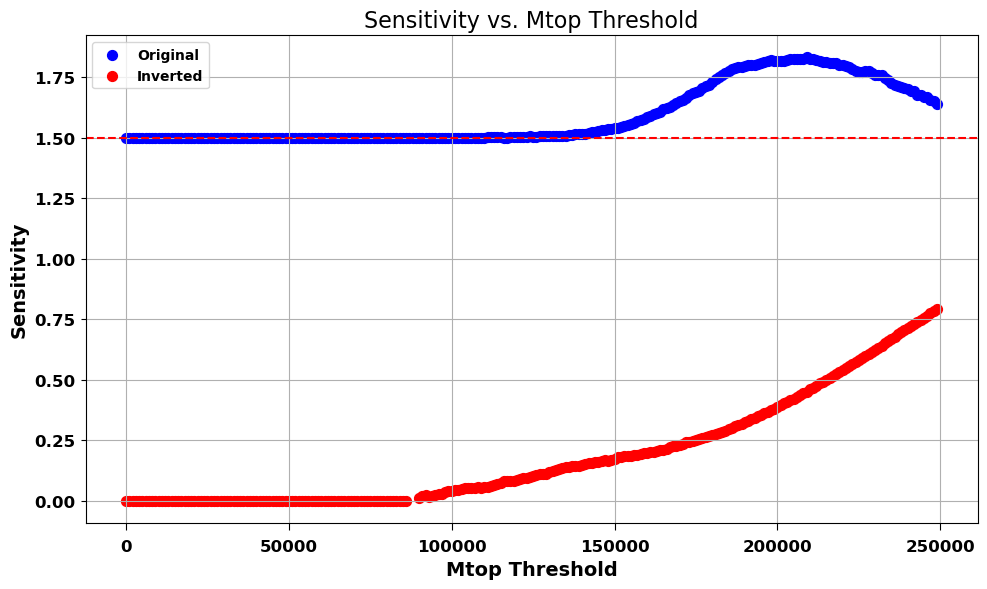

In [11]:

def plot_sensitivity_vs_Mtop_threshold(df):
    """
    Plot mBB sensitivity vs. Mtop threshold.

    Parameters:
    - df: DataFrame containing the Mtop data
    """
    # Create an empty list to store sensitivity values
    sensitivity_list_Mtop = []
    inverted_list_Mtop = []

    # Create values_array with steps of 1000
    values_array_Mtop = np.arange(0, 250000, 1000)

    for i in values_array_Mtop:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['Mtop'] > i]
        
        # Append sensitivity value to the list
        sensitivity_list_Mtop.append(sensitivity_cut_based(temp_df))

    for i in values_array_Mtop:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['Mtop'] < i]
        
        # Append sensitivity value to the list
        inverted_list_Mtop.append(sensitivity_cut_based(temp_df))

    # Convert the arrays to numpy arrays
    sensitivity_array_Mtop = np.array(sensitivity_list_Mtop)
    inverted_array_Mtop = np.array(inverted_list_Mtop)

    # Filter out infinite values for sensitivity
    valid_indices_sensitivity_Mtop = np.isfinite(sensitivity_array_Mtop)
    filtered_sensitivity_array_Mtop = sensitivity_array_Mtop[valid_indices_sensitivity_Mtop]
    filtered_values_array_Mtop_sensitivity = values_array_Mtop[valid_indices_sensitivity_Mtop]

    # Filter out infinite values for inverted
    valid_indices_inverted_Mtop = np.isfinite(inverted_array_Mtop)
    filtered_inverted_array_Mtop = inverted_array_Mtop[valid_indices_inverted_Mtop]
    filtered_values_array_Mtop_inverted = values_array_Mtop[valid_indices_inverted_Mtop]

    # Find the maximum sensitivity value and its corresponding threshold for sensitivity
    max_sensitivity_value_Mtop = np.max(filtered_sensitivity_array_Mtop)
    max_sensitivity_threshold_Mtop = filtered_values_array_Mtop_sensitivity[np.argmax(filtered_sensitivity_array_Mtop)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_Mtop}")
    print(f"Corresponding Mtop Threshold: {max_sensitivity_threshold_Mtop}")

    # Find the maximum sensitivity value and its corresponding threshold for inverted
    max_inverted_value_Mtop = np.max(filtered_inverted_array_Mtop)
    max_inverted_threshold_Mtop = filtered_values_array_Mtop_inverted[np.argmax(filtered_inverted_array_Mtop)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_Mtop}")
    print(f"Corresponding Mtop Threshold: {max_inverted_threshold_Mtop}")

    # Plot the values with enhanced formatting
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_Mtop, sensitivity_array_Mtop, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_Mtop[:len(inverted_array_Mtop)], inverted_array_Mtop, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('Mtop Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. Mtop Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid

    # Add a horizontal red line at a specific y-value
    plt.axhline(y=1.4990772856082444, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.legend()
    plt.show()

plot_sensitivity_vs_Mtop_threshold(df)

### mTW

/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: invalid value encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Maximum Sensitivity Value: 1.4990772856082444
Corresponding mTW Threshold: 0
Maximum Inverted Sensitivity Value: 0.6960741076076536
Corresponding mTW Threshold: 19900


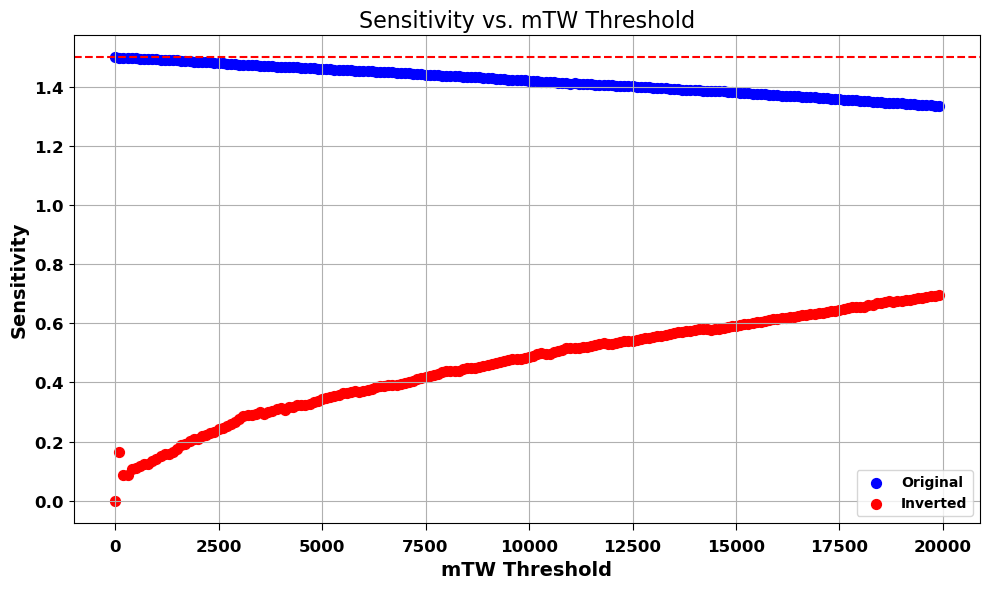

In [10]:

def plot_sensitivity_vs_mTW_threshold(df):
    """
    Plot mBB sensitivity vs. mTW threshold.

    Parameters:
    - df: DataFrame containing the mTW data
    """
    # Create an empty list to store sensitivity values
    sensitivity_list_mTW = []
    inverted_list_mTW = []

    # Create values_array with steps of 100
    values_array_mTW = np.arange(0, 20000, 100)

    for i in values_array_mTW:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['mTW'] > i]
        
        # Append sensitivity value to the list
        sensitivity_list_mTW.append(sensitivity_cut_based(temp_df))

    for i in values_array_mTW:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['mTW'] < i]
        
        # Append sensitivity value to the list
        inverted_list_mTW.append(sensitivity_cut_based(temp_df))

    # Convert the arrays to numpy arrays
    sensitivity_array_mTW = np.array(sensitivity_list_mTW)
    inverted_array_mTW = np.array(inverted_list_mTW)

    # Filter out infinite values for sensitivity
    valid_indices_sensitivity_mTW = np.isfinite(sensitivity_array_mTW)
    filtered_sensitivity_array_mTW = sensitivity_array_mTW[valid_indices_sensitivity_mTW]
    filtered_values_array_mTW_sensitivity = values_array_mTW[valid_indices_sensitivity_mTW]

    # Filter out infinite values for inverted
    valid_indices_inverted_mTW = np.isfinite(inverted_array_mTW)
    filtered_inverted_array_mTW = inverted_array_mTW[valid_indices_inverted_mTW]
    filtered_values_array_mTW_inverted = values_array_mTW[valid_indices_inverted_mTW]

    # Find the maximum sensitivity value and its corresponding threshold for sensitivity
    max_sensitivity_value_mTW = np.max(filtered_sensitivity_array_mTW)
    max_sensitivity_threshold_mTW = filtered_values_array_mTW_sensitivity[np.argmax(filtered_sensitivity_array_mTW)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_mTW}")
    print(f"Corresponding mTW Threshold: {max_sensitivity_threshold_mTW}")

    # Find the maximum sensitivity value and its corresponding threshold for inverted
    max_inverted_value_mTW = np.max(filtered_inverted_array_mTW)
    max_inverted_threshold_mTW = filtered_values_array_mTW_inverted[np.argmax(filtered_inverted_array_mTW)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_mTW}")
    print(f"Corresponding mTW Threshold: {max_inverted_threshold_mTW}")

    # Plot the values with enhanced formatting
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_mTW, sensitivity_array_mTW, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_mTW, inverted_array_mTW, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('mTW Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. mTW Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid

    # Add a horizontal red line at a specific y-value
    plt.axhline(y=1.4990772856082444, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.legend()
    plt.show()

plot_sensitivity_vs_mTW_threshold(df)

### dRBB

/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: invalid value encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin
/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: divide by zero encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Maximum Sensitivity Value: 1.4990772856082444
Corresponding dRBB Threshold: 0.0
Maximum Inverted Sensitivity Value: 1.868656914056315
Corresponding dRBB Threshold: 1.3900000000000001


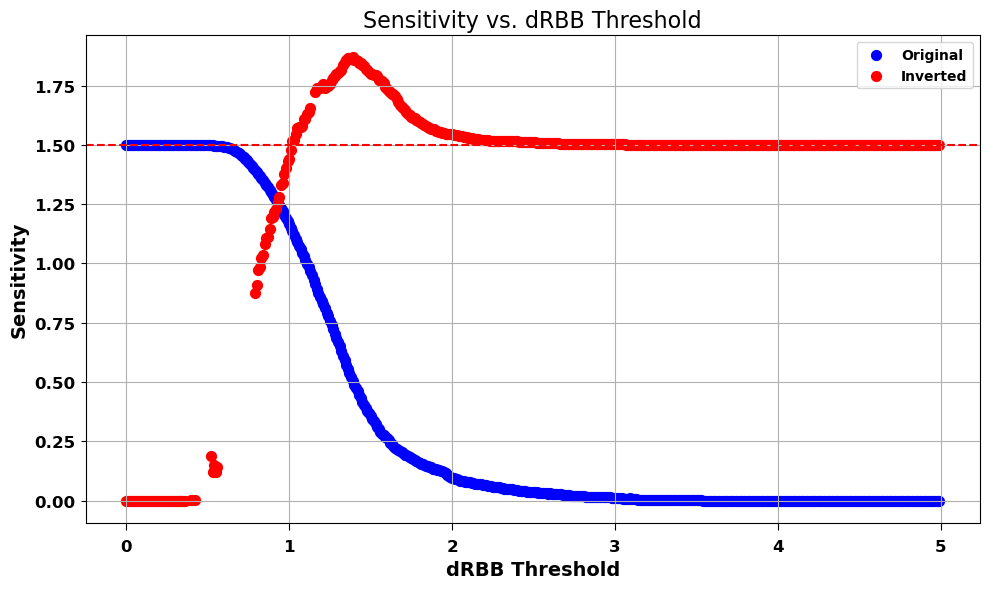

In [5]:
def plot_sensitivity_vs_dRBB_threshold(df):
    """
    Plot mBB sensitivity vs. dRBB threshold

    Parameters:
    - df: DataFrame containing the dRBB data
    """
    # Create an empty list to store sensitivity values
    sensitivity_list_dRBB = []
    inverted_list_dRBB = []

    # Create values_array with steps of 0.01
    values_array_dRBB = np.arange(0, 5, 0.01)

    for i in values_array_dRBB:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['dRBB'] > i]
        
        # Append sensitivity value to the list
        sensitivity_list_dRBB.append(sensitivity_cut_based(temp_df))

    for i in values_array_dRBB:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['dRBB'] < i]
        
        # Append sensitivity value to the list
        inverted_list_dRBB.append(sensitivity_cut_based(temp_df))

    # Convert the arrays to numpy arrays
    sensitivity_array_dRBB = np.array(sensitivity_list_dRBB)
    inverted_array_dRBB = np.array(inverted_list_dRBB)

    # Filter out infinite values for sensitivity
    valid_indices_sensitivity_dRBB = np.isfinite(sensitivity_array_dRBB)
    filtered_sensitivity_array_dRBB = sensitivity_array_dRBB[valid_indices_sensitivity_dRBB]
    filtered_values_array_dRBB_sensitivity = values_array_dRBB[valid_indices_sensitivity_dRBB]

    # Filter out infinite values for inverted
    valid_indices_inverted_dRBB = np.isfinite(inverted_array_dRBB)
    filtered_inverted_array_dRBB = inverted_array_dRBB[valid_indices_inverted_dRBB]
    filtered_values_array_dRBB_inverted = values_array_dRBB[valid_indices_inverted_dRBB]

    # Find the maximum sensitivity value and its corresponding threshold for sensitivity
    max_sensitivity_value_dRBB = np.max(filtered_sensitivity_array_dRBB)
    max_sensitivity_threshold_dRBB = filtered_values_array_dRBB_sensitivity[np.argmax(filtered_sensitivity_array_dRBB)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_dRBB}")
    print(f"Corresponding dRBB Threshold: {max_sensitivity_threshold_dRBB}")

    # Find the maximum sensitivity value and its corresponding threshold for inverted
    max_inverted_value_dRBB = np.max(filtered_inverted_array_dRBB)
    max_inverted_threshold_dRBB = filtered_values_array_dRBB_inverted[np.argmax(filtered_inverted_array_dRBB)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_dRBB}")
    print(f"Corresponding dRBB Threshold: {max_inverted_threshold_dRBB}")

    # Plot the values with enhanced formatting as scatter plot
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_dRBB, sensitivity_array_dRBB, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_dRBB, inverted_array_dRBB, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('dRBB Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. dRBB Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid
    plt.legend()  # Show legend

    # Add a horizontal red line at a specific y-value
    plt.axhline(y=1.4990772856082444, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

plot_sensitivity_vs_dRBB_threshold(df)

### pTB1

Maximum Sensitivity Value: 1.5142158720650567
Corresponding pTB1 Threshold: 79000
Maximum Inverted Sensitivity Value: 1.299760115564516
Corresponding pTB1 Threshold: 200000


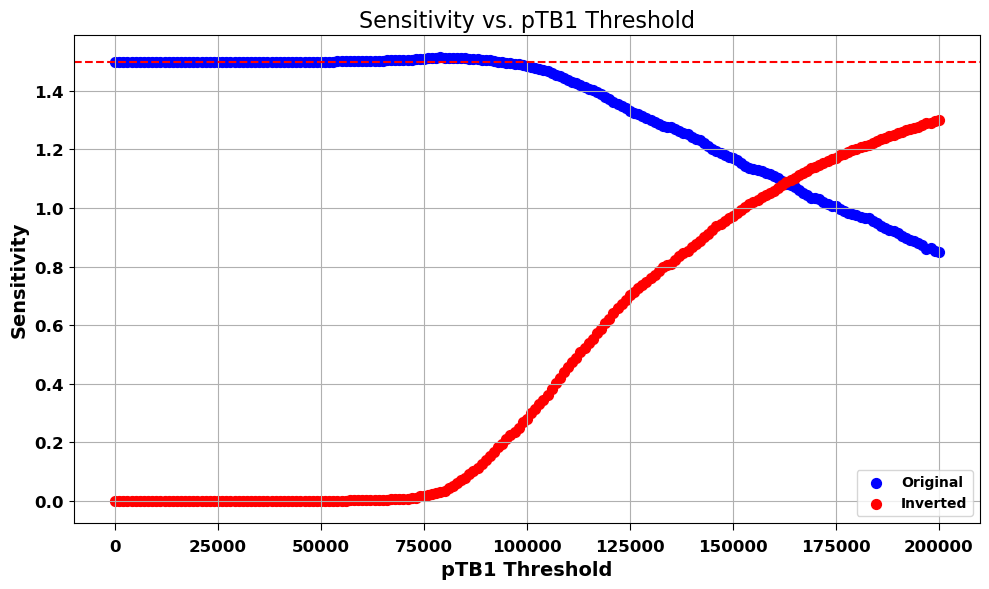

In [6]:
def plot_sensitivity_vs_pTB1_threshold(df):
    """
    Plot mBB sensitivity vs. pTB1 threshold .

    Parameters:
    - df: DataFrame containing the pTB1 data
    """
    # Create an empty list to store sensitivity values
    sensitivity_list_pTB1 = []
    inverted_list_pTB1 = []

    # Create values_array with steps of 1000
    values_array_pTB1 = np.arange(0, 200001, 1000)
    for i in values_array_pTB1:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['pTB1'] > i]
        
        # Append sensitivity value to the list
        sensitivity_list_pTB1.append(sensitivity_cut_based(temp_df))

    for i in values_array_pTB1:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['pTB1'] < i]
        
        # Append sensitivity value to the list
        inverted_list_pTB1.append(sensitivity_cut_based(temp_df))

    # Convert the arrays to numpy arrays
    sensitivity_array_pTB1 = np.array(sensitivity_list_pTB1)
    inverted_array_pTB1 = np.array(inverted_list_pTB1)

    # Filter out infinite values for sensitivity
    valid_indices_sensitivity_pTB1 = np.isfinite(sensitivity_array_pTB1)
    filtered_sensitivity_array_pTB1 = sensitivity_array_pTB1[valid_indices_sensitivity_pTB1]
    filtered_values_array_pTB1_sensitivity = values_array_pTB1[valid_indices_sensitivity_pTB1]

    # Filter out infinite values for inverted
    valid_indices_inverted_pTB1 = np.isfinite(inverted_array_pTB1)
    filtered_inverted_array_pTB1 = inverted_array_pTB1[valid_indices_inverted_pTB1]
    filtered_values_array_pTB1_inverted = values_array_pTB1[valid_indices_inverted_pTB1]

    # Find the maximum sensitivity value and its corresponding threshold for sensitivity
    max_sensitivity_value_pTB1 = np.max(filtered_sensitivity_array_pTB1)
    max_sensitivity_threshold_pTB1 = filtered_values_array_pTB1_sensitivity[np.argmax(filtered_sensitivity_array_pTB1)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_pTB1}")
    print(f"Corresponding pTB1 Threshold: {max_sensitivity_threshold_pTB1}")

    # Find the maximum sensitivity value and its corresponding threshold for inverted
    max_inverted_value_pTB1 = np.max(filtered_inverted_array_pTB1)
    max_inverted_threshold_pTB1 = filtered_values_array_pTB1_inverted[np.argmax(filtered_inverted_array_pTB1)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_pTB1}")
    print(f"Corresponding pTB1 Threshold: {max_inverted_threshold_pTB1}")

    # Plot the values with enhanced formatting
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_pTB1, sensitivity_array_pTB1, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_pTB1, inverted_array_pTB1, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('pTB1 Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. pTB1 Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid

    # Add a horizontal red line at a specific y-value
    plt.axhline(y=1.4990772856082444, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.legend()
    plt.show()

plot_sensitivity_vs_pTB1_threshold(df)

### dYWH

Maximum Sensitivity Value: 1.4990772856082444
Corresponding dYWH Threshold: 0.0
Maximum Inverted Sensitivity Value: 1.5164962546895338
Corresponding dYWH Threshold: 1.72


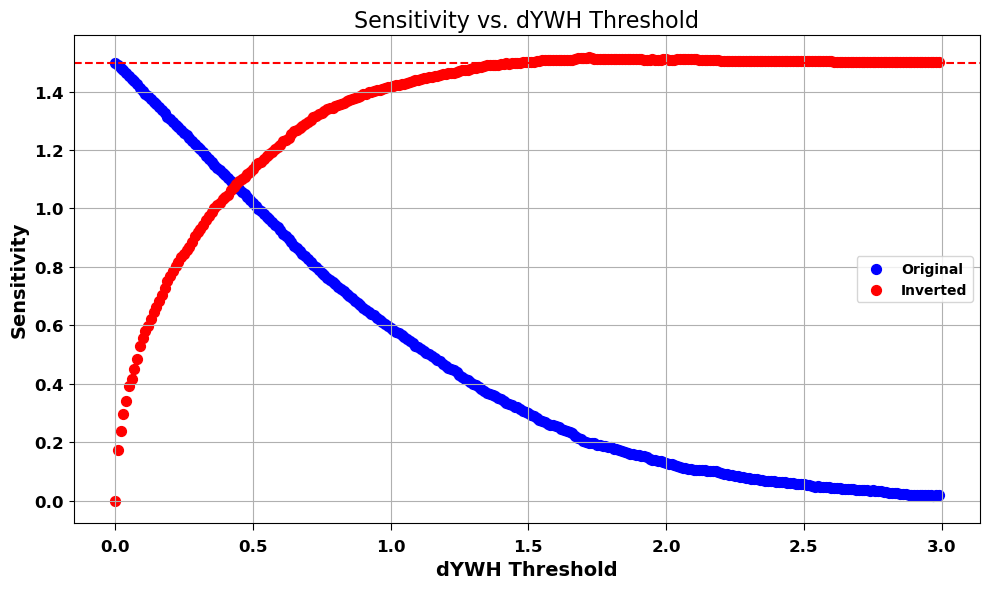

In [14]:
def plot_sensitivity_vs_dYWH_threshold(df):
    """
    Plot mBB sensitivity vs. dYWH threshold

    Parameters:
    - df: DataFrame containing the dYWH data
    """
    # Create an empty list to store sensitivity values
    sensitivity_list_dYWH = []
    inverted_list_dYWH = []

    # Create values_array with steps of 0.01
    values_array_dYWH = np.arange(0, 3, 0.01)

    for i in values_array_dYWH:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['dYWH'] > i]
        
        # Append sensitivity value to the list
        sensitivity_list_dYWH.append(sensitivity_cut_based(temp_df))

    for i in values_array_dYWH:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['dYWH'] < i]
        
        # Append sensitivity value to the list
        inverted_list_dYWH.append(sensitivity_cut_based(temp_df))

    # Convert the arrays to numpy arrays
    sensitivity_array_dYWH = np.array(sensitivity_list_dYWH)
    inverted_array_dYWH = np.array(inverted_list_dYWH)

    # Filter out infinite values for sensitivity
    valid_indices_sensitivity_dYWH = np.isfinite(sensitivity_array_dYWH)
    filtered_sensitivity_array_dYWH = sensitivity_array_dYWH[valid_indices_sensitivity_dYWH]
    filtered_values_array_dYWH_sensitivity = values_array_dYWH[valid_indices_sensitivity_dYWH]

    # Filter out infinite values for inverted
    valid_indices_inverted_dYWH = np.isfinite(inverted_array_dYWH)
    filtered_inverted_array_dYWH = inverted_array_dYWH[valid_indices_inverted_dYWH]
    filtered_values_array_dYWH_inverted = values_array_dYWH[valid_indices_inverted_dYWH]

    # Find the maximum sensitivity value and its corresponding threshold for sensitivity
    max_sensitivity_value_dYWH = np.max(filtered_sensitivity_array_dYWH)
    max_sensitivity_threshold_dYWH = filtered_values_array_dYWH_sensitivity[np.argmax(filtered_sensitivity_array_dYWH)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_dYWH}")
    print(f"Corresponding dYWH Threshold: {max_sensitivity_threshold_dYWH}")

    # Find the maximum sensitivity value and its corresponding threshold for inverted
    max_inverted_value_dYWH = np.max(filtered_inverted_array_dYWH)
    max_inverted_threshold_dYWH = filtered_values_array_dYWH_inverted[np.argmax(filtered_inverted_array_dYWH)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_dYWH}")
    print(f"Corresponding dYWH Threshold: {max_inverted_threshold_dYWH}")

    # Plot the values with enhanced formatting
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_dYWH, sensitivity_array_dYWH, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_dYWH, inverted_array_dYWH, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('dYWH Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. dYWH Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid

    # Add a horizontal red line at a specific y-value
    plt.axhline(y=1.4990772856082444, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.legend()
    plt.show()


plot_sensitivity_vs_dYWH_threshold(df)

### MET

/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: divide by zero encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Maximum Sensitivity Value: 1.4991532694653695
Corresponding MET Threshold: 1000
Maximum Inverted Sensitivity Value: 1.2570235355766526
Corresponding MET Threshold: 139000


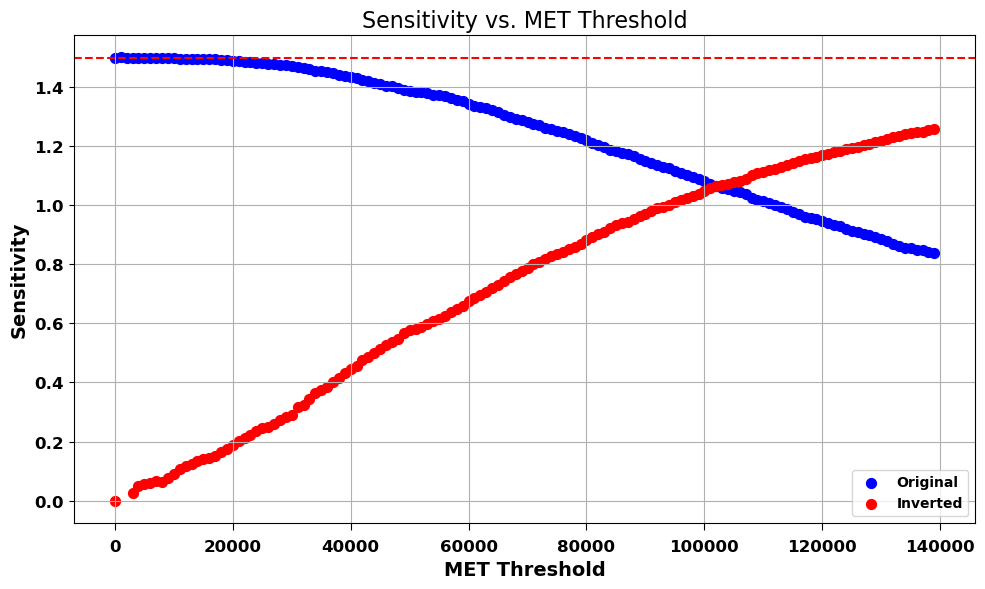

In [13]:


def plot_sensitivity_vs_MET_threshold(df):
    """en 
    Plot mBB sensitivity vs. MET threshold 

    Parameters:
    - df: DataFrame containing the MET data
    """
    # Create an empty list to store sensitivity values
    sensitivity_list_MET = []
    inverted_list_MET = []

    # Create values_array with steps of 1000
    values_array_MET  = np.arange(0, 140000, 1000)

    for i in values_array_MET:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['MET'] > i]
        
        # Append sensitivity value to the list
        sensitivity_list_MET.append(sensitivity_cut_based(temp_df))

    for i in values_array_MET:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['MET'] < i]
        
        # Append sensitivity value to the list
        inverted_list_MET.append(sensitivity_cut_based(temp_df))

    # Convert the arrays to numpy arrays
    sensitivity_array_MET = np.array(sensitivity_list_MET)
    inverted_array_MET = np.array(inverted_list_MET)

    # Filter out infinite values for sensitivity
    valid_indices_sensitivity_MET = np.isfinite(sensitivity_array_MET)
    filtered_sensitivity_array_MET = sensitivity_array_MET[valid_indices_sensitivity_MET]
    filtered_values_array_MET_sensitivity = values_array_MET[valid_indices_sensitivity_MET]

    # Filter out infinite values for inverted
    valid_indices_inverted_MET = np.isfinite(inverted_array_MET)
    filtered_inverted_array_MET = inverted_array_MET[valid_indices_inverted_MET]
    filtered_values_array_MET_inverted = values_array_MET[valid_indices_inverted_MET]

    # Find the maximum sensitivity value and its corresponding threshold for sensitivity
    max_sensitivity_value_MET = np.max(filtered_sensitivity_array_MET)
    max_sensitivity_threshold_MET = filtered_values_array_MET_sensitivity[np.argmax(filtered_sensitivity_array_MET)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_MET}")
    print(f"Corresponding MET Threshold: {max_sensitivity_threshold_MET}")

    # Find the maximum sensitivity value and its corresponding threshold for inverted
    max_inverted_value_MET = np.max(filtered_inverted_array_MET)
    max_inverted_threshold_MET = filtered_values_array_MET_inverted[np.argmax(filtered_inverted_array_MET)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_MET}")
    print(f"Corresponding MET Threshold: {max_inverted_threshold_MET}")

    # Plot the values with enhanced formatting
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_MET, sensitivity_array_MET, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_MET, inverted_array_MET, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('MET Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. MET Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid

    # Add a horizontal red line at a specific y-value
    plt.axhline(y=1.4990772856082444, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.legend()
    plt.show()


plot_sensitivity_vs_MET_threshold(df)

### pTV

/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: invalid value encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Maximum Sensitivity Value: 1.5219585629060768
Corresponding pTV Threshold: 170000
Maximum Inverted Sensitivity Value: 0.8942818484911537
Corresponding pTV Threshold: 199000


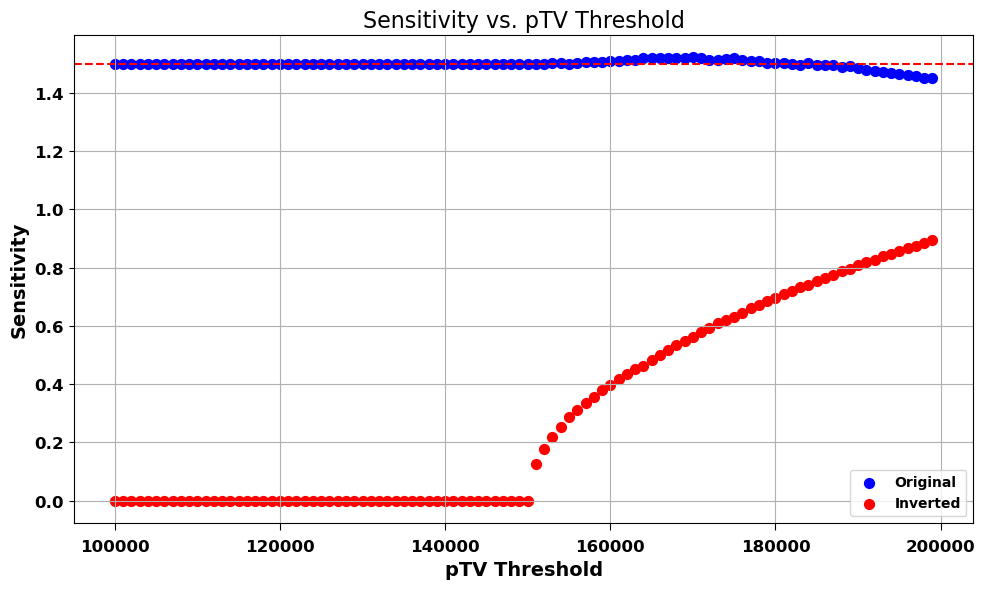

In [8]:

def plot_sensitivity_vs_pTV_threshold(df):
    """
    Plot mBB sensitivity vs. pTV threshold .

    Parameters:
    - df: DataFrame containing the pTV data
    """
    # Create an empty list to store sensitivity values
    sensitivity_list_pTV = []
    inverted_list_pTV = []

    # Create values_array with steps of 1000
    values_array_pTV = np.arange(100000, 200000, 1000)

    for i in values_array_pTV:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['pTV'] > i]
        
        # Append sensitivity value to the list
        sensitivity_list_pTV.append(sensitivity_cut_based(temp_df))

    for i in values_array_pTV:
        # Create a copy of the original dataset and filter it
        temp_df = df.copy()
        temp_df = temp_df.loc[temp_df['pTV'] < i]
        
        # Append sensitivity value to the list
        inverted_list_pTV.append(sensitivity_cut_based(temp_df))

    # Convert the arrays to numpy arrays
    sensitivity_array_pTV = np.array(sensitivity_list_pTV)
    inverted_array_pTV = np.array(inverted_list_pTV)

    # Filter out infinite values for sensitivity
    valid_indices_sensitivity_pTV = np.isfinite(sensitivity_array_pTV)
    filtered_sensitivity_array_pTV = sensitivity_array_pTV[valid_indices_sensitivity_pTV]
    filtered_values_array_pTV_sensitivity = values_array_pTV[valid_indices_sensitivity_pTV]

    # Filter out infinite values for inverted
    valid_indices_inverted_pTV = np.isfinite(inverted_array_pTV)
    filtered_inverted_array_pTV = inverted_array_pTV[valid_indices_inverted_pTV]
    filtered_values_array_pTV_inverted = values_array_pTV[valid_indices_inverted_pTV]

    # Find the maximum sensitivity value and its corresponding threshold for sensitivity
    max_sensitivity_value_pTV = np.max(filtered_sensitivity_array_pTV)
    max_sensitivity_threshold_pTV = filtered_values_array_pTV_sensitivity[np.argmax(filtered_sensitivity_array_pTV)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_pTV}")
    print(f"Corresponding pTV Threshold: {max_sensitivity_threshold_pTV}")

    # Find the maximum sensitivity value and its corresponding threshold for inverted
    max_inverted_value_pTV = np.max(filtered_inverted_array_pTV)
    max_inverted_threshold_pTV = filtered_values_array_pTV_inverted[np.argmax(filtered_inverted_array_pTV)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_pTV}")
    print(f"Corresponding pTV Threshold: {max_inverted_threshold_pTV}")

    # Plot the values with enhanced formatting
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_pTV, sensitivity_array_pTV, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_pTV, inverted_array_pTV, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('pTV Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. pTV Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid

    # Add a horizontal red line at a specific y-value
    plt.axhline(y=1.4990772856082444, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.legend()
    plt.show()
    
plot_sensitivity_vs_pTV_threshold(df)

### 3 Variable Output 

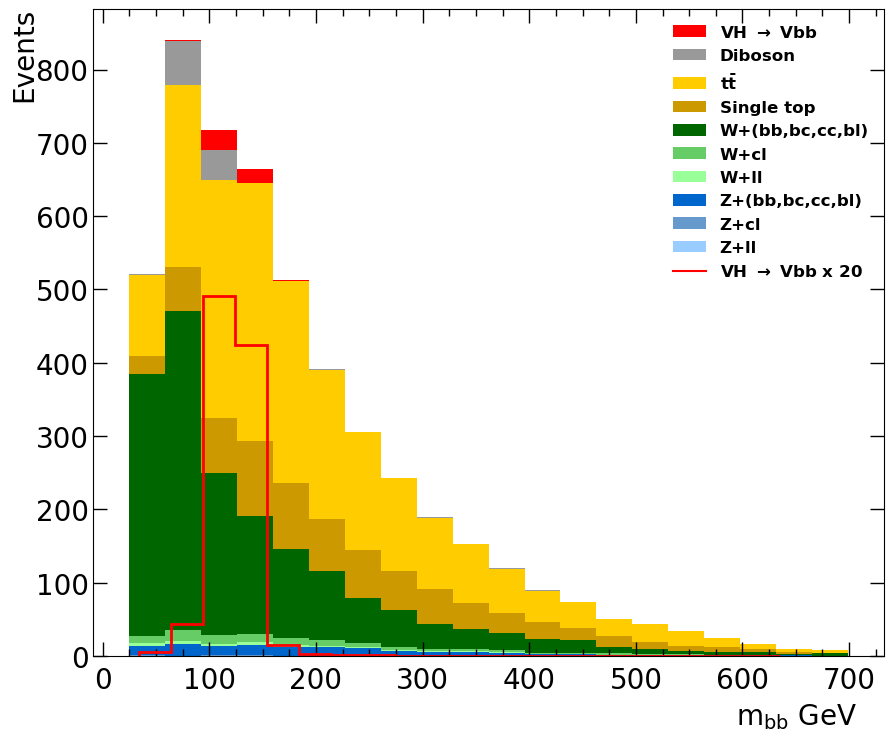

Sensitivity achieved before cuts  1.4990772856082444


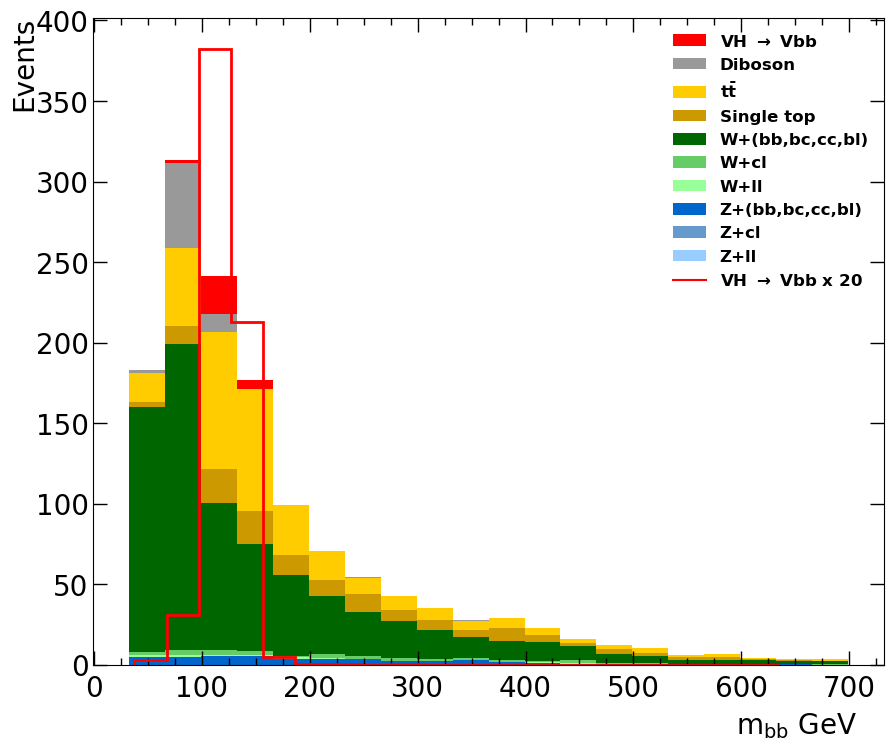

Sensitivity achieved after cuts  1.7957875845326716


In [25]:


df = pd.read_csv('../data-v2/VHbb_data_2jet.csv')


df = df.loc[df['Mtop'] > 209000]
df = df.loc[df['pTB2'] > 49000]
df = df.loc[df['pTV'] > 140000]


plot_variable(df_original,'mBB')



print("Sensitivity achieved before cuts ",sensitivity_cut_based(df_original))


plot_variable(df,'mBB')


print("Sensitivity achieved after cuts ",sensitivity_cut_based(df))



## Fourth Variable Trial 

### mTW

/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: invalid value encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Maximum Sensitivity Value: 1.7957875845326716
Corresponding mTW Threshold: 0
Maximum Inverted Sensitivity Value: 1.7957875845326716
Corresponding mTW Threshold: 100


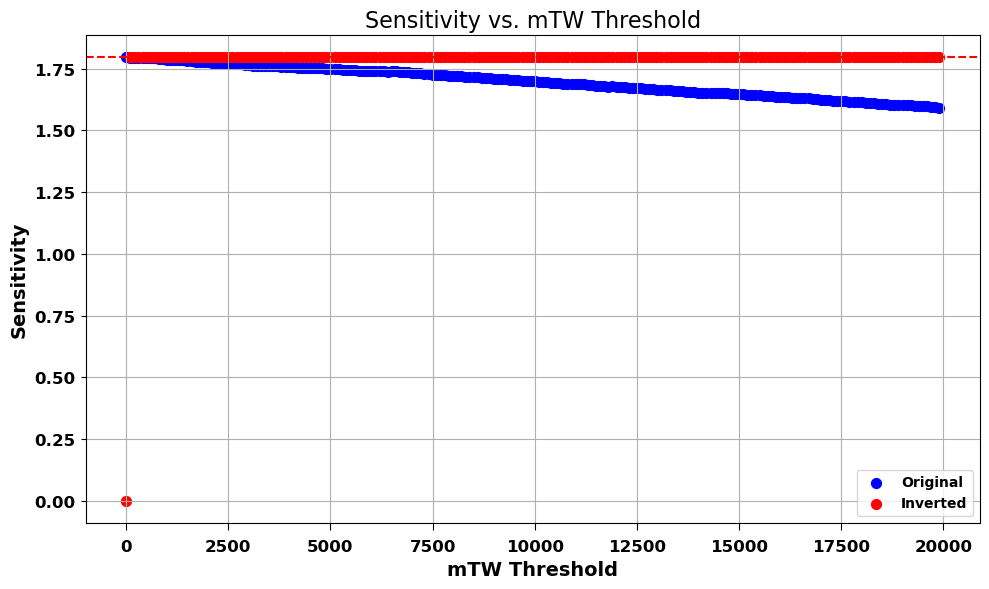

In [19]:


def plot_sensitivity_vs_mTW_threshold_2(df):
    # Filter the DataFrame based on specific conditions
    df_filtered = df.loc[df['Mtop'] > 209000]
    df_filtered = df_filtered.loc[df_filtered['pTB2'] > 49000]
    df_filtered = df_filtered.loc[df_filtered['pTV'] > 140000]

    # Create empty lists to store sensitivity values
    sensitivity_list_mTW = []
    inverted_list_mTW = []

    # Create values_array with steps of 100
    values_array_mTW = np.arange(0, 20000, 100)

    for i in values_array_mTW:
        # Create a copy of the filtered dataset and filter it further
        temp_df = df_filtered.copy()
        temp_df = temp_df.loc[temp_df['mTW'] > i]
        
        # Append sensitivity value to the list
        sensitivity_list_mTW.append(sensitivity_cut_based(temp_df))

        # Create a copy of the filtered dataset and filter it further
        temp_df = df_filtered.copy()
        temp_df = temp_df.loc[temp_df['dRBB'] < i]

        inverted_list_mTW.append(sensitivity_cut_based(temp_df))

    # Convert the lists to numpy arrays
    sensitivity_array_mTW = np.array(sensitivity_list_mTW)
    inverted_array_mTW = np.array(inverted_list_mTW)

    # Filter out infinite values for sensitivity
    valid_indices_sensitivity_mTW = np.isfinite(sensitivity_array_mTW)
    filtered_sensitivity_array_mTW = sensitivity_array_mTW[valid_indices_sensitivity_mTW]
    filtered_values_array_mTW_sensitivity = values_array_mTW[valid_indices_sensitivity_mTW]

    # Filter out infinite values for inverted
    valid_indices_inverted_mTW = np.isfinite(inverted_array_mTW)
    filtered_inverted_array_mTW = inverted_array_mTW[valid_indices_inverted_mTW]
    filtered_values_array_mTW_inverted = values_array_mTW[valid_indices_inverted_mTW]

    # Find the maximum sensitivity value and its corresponding threshold for sensitivity
    max_sensitivity_value_mTW = np.max(filtered_sensitivity_array_mTW)
    max_sensitivity_threshold_mTW = filtered_values_array_mTW_sensitivity[np.argmax(filtered_sensitivity_array_mTW)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_mTW}")
    print(f"Corresponding mTW Threshold: {max_sensitivity_threshold_mTW}")

    # Find the maximum sensitivity value and its corresponding threshold for inverted
    max_inverted_value_mTW = np.max(filtered_inverted_array_mTW)
    max_inverted_threshold_mTW = filtered_values_array_mTW_inverted[np.argmax(filtered_inverted_array_mTW)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_mTW}")
    print(f"Corresponding mTW Threshold: {max_inverted_threshold_mTW}")

    # Plot the values
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_mTW, sensitivity_array_mTW, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_mTW, inverted_array_mTW, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('mTW Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. mTW Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid

    # Add a horizontal red line at a specific y-value
    plt.axhline(y=1.7957875845326716, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.legend()
    plt.show()


plot_sensitivity_vs_mTW_threshold_2(df)

### dRBB

/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: invalid value encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin
/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: divide by zero encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Maximum Sensitivity Value: 1.7957875845326716
Corresponding dRBB Threshold: 0.0
Maximum Inverted Sensitivity Value: 1.862713220425499
Corresponding dRBB Threshold: 1.3900000000000001


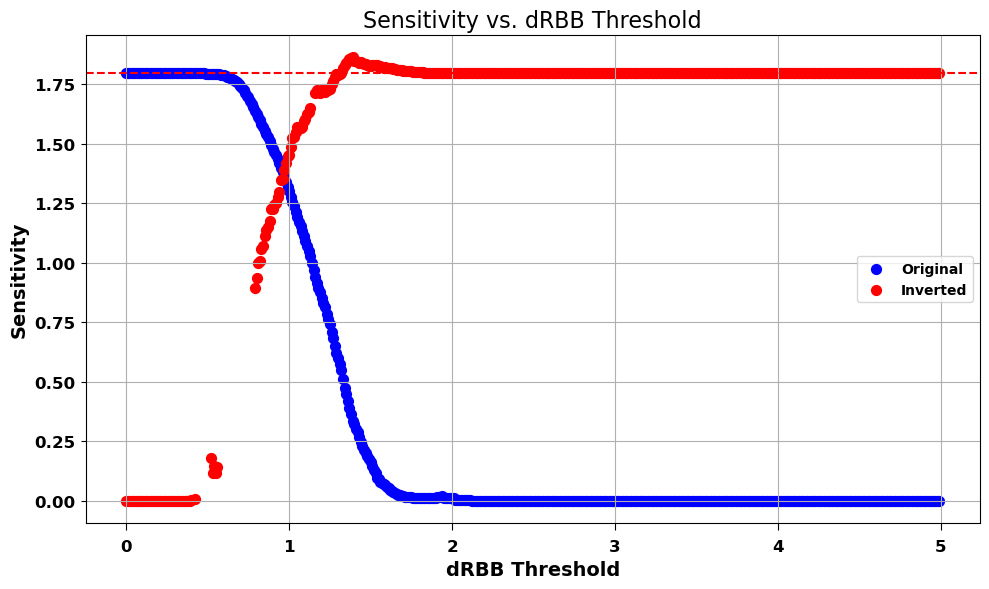

In [21]:

def plot_sensitivity_vs_dRBB_threshold_2(df):
    df_filtered = df.loc[df['Mtop'] > 209000]
    df_filtered = df_filtered.loc[df_filtered['pTB2'] > 49000]
    df_filtered = df_filtered.loc[df_filtered['pTV'] > 140000]

    sensitivity_list_dRBB = []
    inverted_list_dRBB = []

    values_array_dRBB = np.arange(0, 5, 0.01)

    for i in values_array_dRBB:
        temp_df = df_filtered.copy()
        temp_df = temp_df.loc[temp_df['dRBB'] > i]
        sensitivity_list_dRBB.append(sensitivity_cut_based(temp_df))

        temp_df = df_filtered.copy()
        temp_df = temp_df.loc[temp_df['dRBB'] < i]
        inverted_list_dRBB.append(sensitivity_cut_based(temp_df))

    sensitivity_array_dRBB = np.array(sensitivity_list_dRBB)
    inverted_array_dRBB = np.array(inverted_list_dRBB)

    valid_indices_sensitivity_dRBB = np.isfinite(sensitivity_array_dRBB)
    filtered_sensitivity_array_dRBB = sensitivity_array_dRBB[valid_indices_sensitivity_dRBB]
    filtered_values_array_dRBB_sensitivity = values_array_dRBB[valid_indices_sensitivity_dRBB]

    valid_indices_inverted_dRBB = np.isfinite(inverted_array_dRBB)
    filtered_inverted_array_dRBB = inverted_array_dRBB[valid_indices_inverted_dRBB]
    filtered_values_array_dRBB_inverted = values_array_dRBB[valid_indices_inverted_dRBB]

    max_sensitivity_value_dRBB = np.max(filtered_sensitivity_array_dRBB)
    max_sensitivity_threshold_dRBB = filtered_values_array_dRBB_sensitivity[np.argmax(filtered_sensitivity_array_dRBB)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_dRBB}")
    print(f"Corresponding dRBB Threshold: {max_sensitivity_threshold_dRBB}")

    max_inverted_value_dRBB = np.max(filtered_inverted_array_dRBB)
    max_inverted_threshold_dRBB = filtered_values_array_dRBB_inverted[np.argmax(filtered_inverted_array_dRBB)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_dRBB}")
    print(f"Corresponding dRBB Threshold: {max_inverted_threshold_dRBB}")

    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_dRBB, sensitivity_array_dRBB, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_dRBB, inverted_array_dRBB, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('dRBB Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. dRBB Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid
    plt.legend()  # Show legend

    # Add a horizontal red line at a specific y-value
    plt.axhline(y=1.7957875845326716, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

plot_sensitivity_vs_dRBB_threshold_2(df)

### pTB1

/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: invalid value encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin
/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: divide by zero encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Maximum Sensitivity Value: 1.8085688279450924
Corresponding pTB1 Threshold: 78000
Maximum Inverted Sensitivity Value: 1.718676029518424
Corresponding pTB1 Threshold: 250000


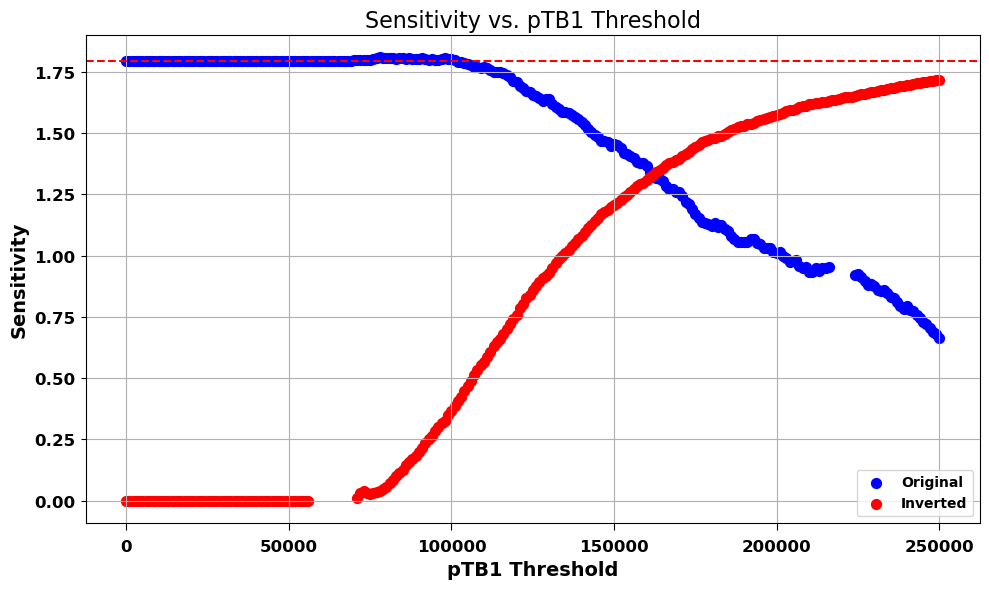

In [22]:


def plot_sensitivity_vs_pTB1_threshold_2(df):
    df_filtered = df.loc[df['Mtop'] > 209000]
    df_filtered = df_filtered.loc[df_filtered['pTB2'] > 49000]
    df_filtered = df_filtered.loc[df_filtered['pTV'] > 140000]

    sensitivity_list_pTB1 = []
    inverted_list_pTB1 = []

    values_array_pTB1 = np.arange(0, 250001, 1000)
    for i in values_array_pTB1:
        temp_df = df_filtered.copy()
        temp_df = temp_df.loc[temp_df['pTB1'] > i]
        sensitivity_list_pTB1.append(sensitivity_cut_based(temp_df))

        temp_df = df_filtered.copy()
        temp_df = temp_df.loc[temp_df['pTB1'] < i]
        inverted_list_pTB1.append(sensitivity_cut_based(temp_df))

    sensitivity_array_pTB1 = np.array(sensitivity_list_pTB1)
    inverted_array_pTB1 = np.array(inverted_list_pTB1)

    valid_indices_sensitivity_pTB1 = np.isfinite(sensitivity_array_pTB1)
    filtered_sensitivity_array_pTB1 = sensitivity_array_pTB1[valid_indices_sensitivity_pTB1]
    filtered_values_array_pTB1_sensitivity = values_array_pTB1[valid_indices_sensitivity_pTB1]

    valid_indices_inverted_pTB1 = np.isfinite(inverted_array_pTB1)
    filtered_inverted_array_pTB1 = inverted_array_pTB1[valid_indices_inverted_pTB1]
    filtered_values_array_pTB1_inverted = values_array_pTB1[valid_indices_inverted_pTB1]

    max_sensitivity_value_pTB1 = np.max(filtered_sensitivity_array_pTB1)
    max_sensitivity_threshold_pTB1 = filtered_values_array_pTB1_sensitivity[np.argmax(filtered_sensitivity_array_pTB1)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_pTB1}")
    print(f"Corresponding pTB1 Threshold: {max_sensitivity_threshold_pTB1}")

    max_inverted_value_pTB1 = np.max(filtered_inverted_array_pTB1)
    max_inverted_threshold_pTB1 = filtered_values_array_pTB1_inverted[np.argmax(filtered_inverted_array_pTB1)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_pTB1}")
    print(f"Corresponding pTB1 Threshold: {max_inverted_threshold_pTB1}")

    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_pTB1, sensitivity_array_pTB1, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_pTB1, inverted_array_pTB1, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('pTB1 Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. pTB1 Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid
    plt.legend()  # Show legend

    # Add a horizontal red line at a specific y-value
    plt.axhline(y=1.7957875845326716, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()
plot_sensitivity_vs_pTB1_threshold_2(df)

### dYWH

/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: invalid value encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Maximum Sensitivity Value: 1.7957875845326716
Corresponding dYWH Threshold: 0.0
Maximum Inverted Sensitivity Value: 1.8268940710194204
Corresponding dYWH Threshold: 1.72


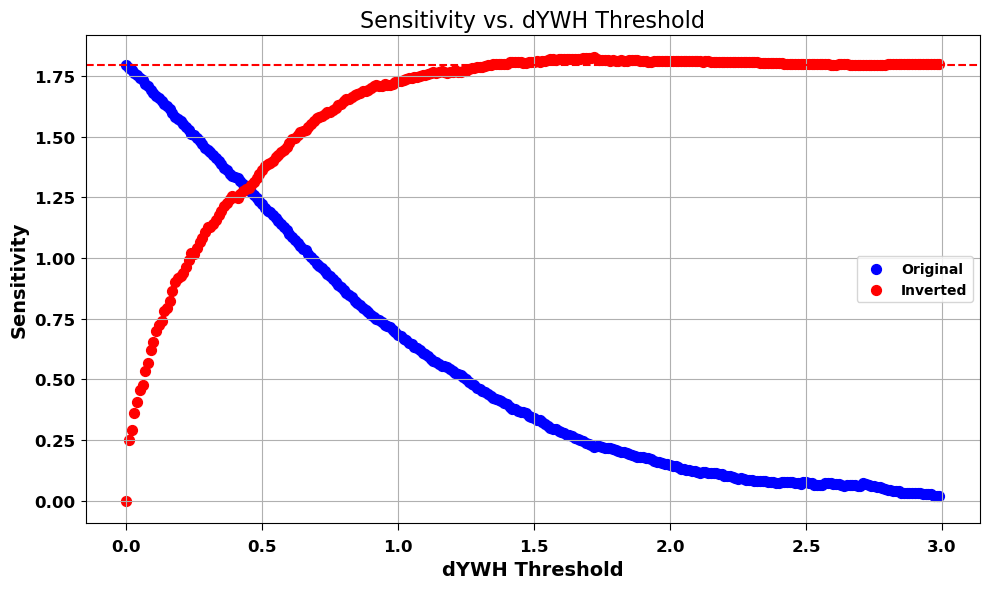

In [23]:
def plot_sensitivity_vs_dYWH_threshold_2(df):
    df_filtered = df.loc[df['Mtop'] > 209000]
    df_filtered = df_filtered.loc[df_filtered['pTB2'] > 49000]
    df_filtered = df_filtered.loc[df_filtered['pTV'] > 140000]

    sensitivity_list_dYWH = []
    inverted_list_dYWH = []

    values_array_dYWH = np.arange(0, 3, 0.01)
    for i in values_array_dYWH:
        temp_df = df_filtered.copy()
        temp_df = temp_df.loc[temp_df['dYWH'] > i]
        sensitivity_list_dYWH.append(sensitivity_cut_based(temp_df))

        temp_df = df_filtered.copy()
        temp_df = temp_df.loc[temp_df['dYWH'] < i]
        inverted_list_dYWH.append(sensitivity_cut_based(temp_df))

    sensitivity_array_dYWH = np.array(sensitivity_list_dYWH)
    inverted_array_dYWH = np.array(inverted_list_dYWH)

    valid_indices_sensitivity_dYWH = np.isfinite(sensitivity_array_dYWH)
    filtered_sensitivity_array_dYWH = sensitivity_array_dYWH[valid_indices_sensitivity_dYWH]
    filtered_values_array_dYWH_sensitivity = values_array_dYWH[valid_indices_sensitivity_dYWH]

    valid_indices_inverted_dYWH = np.isfinite(inverted_array_dYWH)
    filtered_inverted_array_dYWH = inverted_array_dYWH[valid_indices_inverted_dYWH]
    filtered_values_array_dYWH_inverted = values_array_dYWH[valid_indices_inverted_dYWH]

    max_sensitivity_value_dYWH = np.max(filtered_sensitivity_array_dYWH)
    max_sensitivity_threshold_dYWH = filtered_values_array_dYWH_sensitivity[np.argmax(filtered_sensitivity_array_dYWH)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_dYWH}")
    print(f"Corresponding dYWH Threshold: {max_sensitivity_threshold_dYWH}")

    max_inverted_value_dYWH = np.max(filtered_inverted_array_dYWH)
    max_inverted_threshold_dYWH = filtered_values_array_dYWH_inverted[np.argmax(filtered_inverted_array_dYWH)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_dYWH}")
    print(f"Corresponding dYWH Threshold: {max_inverted_threshold_dYWH}")

    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_dYWH, sensitivity_array_dYWH, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_dYWH, inverted_array_dYWH, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('dYWH Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. dYWH Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid
    plt.legend()  # Show legend

    # Add a horizontal red line at a specific y-value
    plt.axhline(y=1.7957875845326716, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

plot_sensitivity_vs_dYWH_threshold_2(df)

### MET

/Users/yannzurstrassen/Documents/PHAS0056/in2HEP-master/notebooks/ucl_masterclass.py:537: RuntimeWarning: divide by zero encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Maximum Sensitivity Value: 1.7965345108812587
Corresponding MET Threshold: 8000
Maximum Inverted Sensitivity Value: 1.6832364449217685
Corresponding MET Threshold: 199000


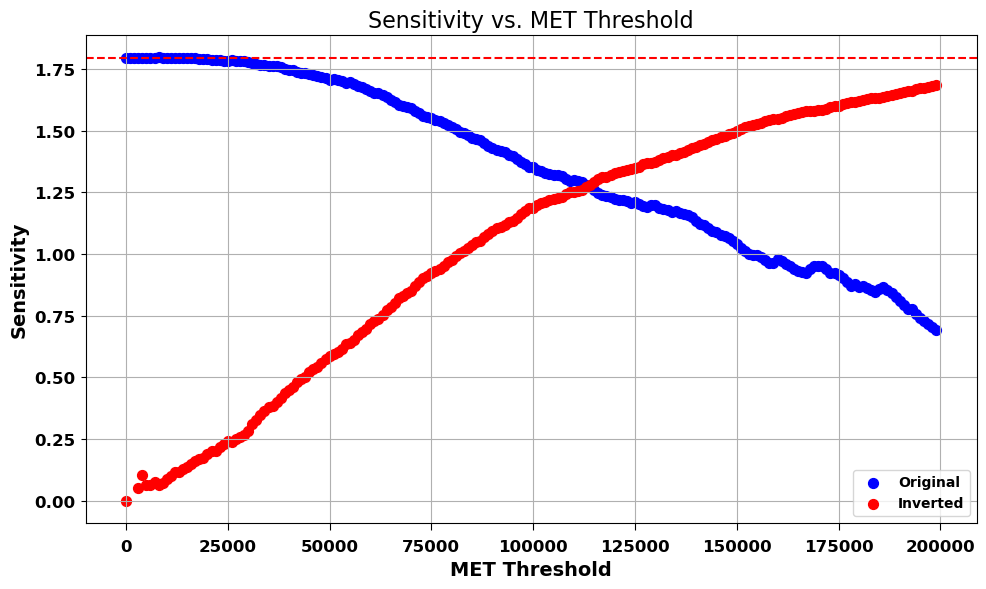

In [24]:
def plot_sensitivity_vs_MET_threshold_2(df):
    df_filtered = df.loc[df['Mtop'] > 209000]
    df_filtered = df_filtered.loc[df_filtered['pTB2'] > 49000]
    df_filtered = df_filtered.loc[df_filtered['pTV'] > 140000]

    sensitivity_list_MET = []
    inverted_list_MET = []

    values_array_MET = np.arange(0, 200000, 1000)
    for i in values_array_MET:
        temp_df = df_filtered.copy()
        temp_df = temp_df.loc[temp_df['MET'] > i]
        sensitivity_list_MET.append(sensitivity_cut_based(temp_df))

        temp_df = df_filtered.copy()
        temp_df = temp_df.loc[temp_df['MET'] < i]
        inverted_list_MET.append(sensitivity_cut_based(temp_df))

    sensitivity_array_MET = np.array(sensitivity_list_MET)
    inverted_array_MET = np.array(inverted_list_MET)

    valid_indices_sensitivity_MET = np.isfinite(sensitivity_array_MET)
    filtered_sensitivity_array_MET = sensitivity_array_MET[valid_indices_sensitivity_MET]
    filtered_values_array_MET_sensitivity = values_array_MET[valid_indices_sensitivity_MET]

    valid_indices_inverted_MET = np.isfinite(inverted_array_MET)
    filtered_inverted_array_MET = inverted_array_MET[valid_indices_inverted_MET]
    filtered_values_array_MET_inverted = values_array_MET[valid_indices_inverted_MET]

    max_sensitivity_value_MET = np.max(filtered_sensitivity_array_MET)
    max_sensitivity_threshold_MET = filtered_values_array_MET_sensitivity[np.argmax(filtered_sensitivity_array_MET)]
    print(f"Maximum Sensitivity Value: {max_sensitivity_value_MET}")
    print(f"Corresponding MET Threshold: {max_sensitivity_threshold_MET}")

    max_inverted_value_MET = np.max(filtered_inverted_array_MET)
    max_inverted_threshold_MET = filtered_values_array_MET_inverted[np.argmax(filtered_inverted_array_MET)]
    print(f"Maximum Inverted Sensitivity Value: {max_inverted_value_MET}")
    print(f"Corresponding MET Threshold: {max_inverted_threshold_MET}")

    plt.figure(figsize=(10, 6))  # Adjust the figure size
    plt.scatter(values_array_MET, sensitivity_array_MET, color='b', marker='o', s=50, label='Original')  # Original data
    plt.scatter(values_array_MET, inverted_array_MET, color='r', marker='o', s=50, label='Inverted')  # Inverted data
    plt.xlabel('MET Threshold', fontsize=14)  # Set x-axis label and font size
    plt.ylabel('Sensitivity', fontsize=14)  # Set y-axis label and font size
    plt.title('Sensitivity vs. MET Threshold', fontsize=16)  # Set plot title and font size
    plt.xticks(fontsize=12)  # Set x-axis tick labels font size
    plt.yticks(fontsize=12)  # Set y-axis tick labels font size
    plt.grid(True)  # Add grid
    plt.legend()  # Show legend

    # Add a horizontal red line at a specific y-value
    plt.axhline(y=1.7957875845326716, color='r', linestyle='--')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


plot_sensitivity_vs_MET_threshold_2(df)

## Final Cut Based Model 

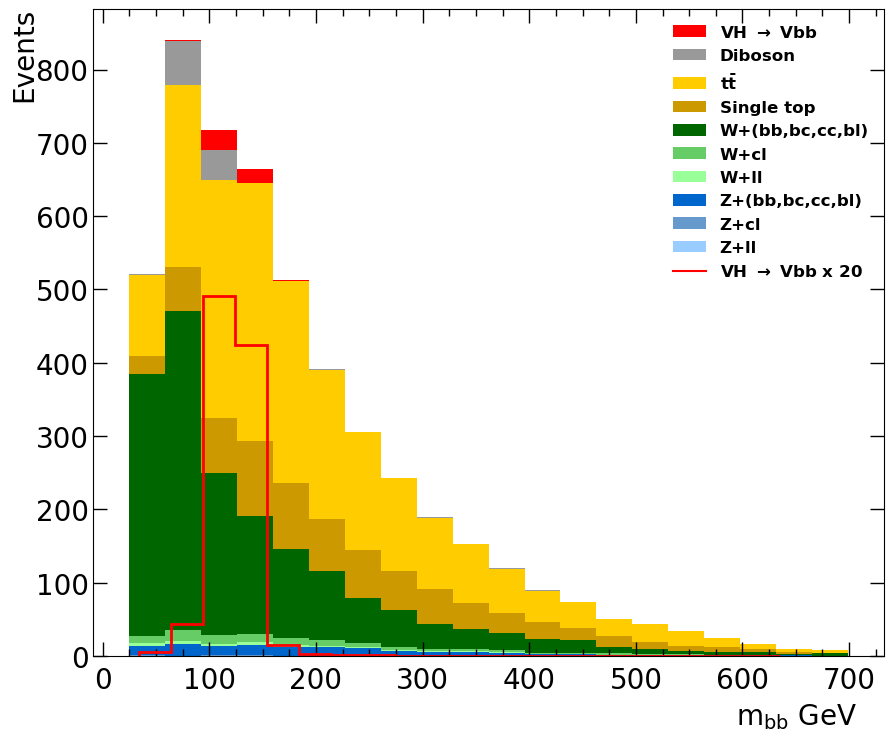

Sensitivity achieved before cuts  1.4990772856082444


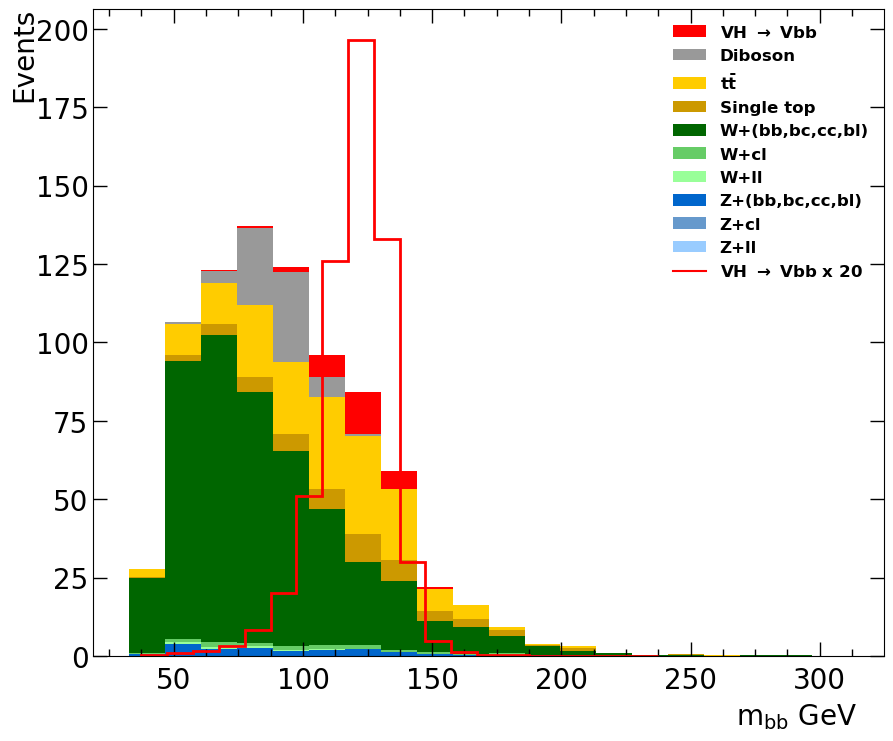

Sensitivity achieved after cuts  1.862713220425499


In [26]:
df = pd.read_csv('../data-v2/VHbb_data_2jet.csv')


df = df.loc[df['Mtop'] > 209000]
df = df.loc[df['pTB2'] > 49000]
df = df.loc[df['dRBB'] < 1.39]
df = df.loc[df['pTV'] > 140000]

plot_variable(df_original,'mBB')



print("Sensitivity achieved before cuts ",sensitivity_cut_based(df_original))


plot_variable(df,'mBB')


print("Sensitivity achieved after cuts ",sensitivity_cut_based(df))